# Ligand Networks by Hand

OpenFE provides utilities for ingesting networks from ordinary Python datastructures like `list[tuple[str, str]]` and `list[tuple[int, int]]`. Each string or integer respectively names or indexes a ligand, and tuples represent edges in the network. This allows specific networks to be written by hand, supports use cases where the desired edges are known, and may be helpful for loading networks from other tools.

## Setup

In [1]:
%matplotlib inline

from rdkit import Chem

import openfe
from openfe.setup import ligand_network_planning

This cookbook assumes you've already loaded a collection of `SmallMoleculeComponent` objects into an iterable called `ligands`. For more information, see [Loading Small Molecules]:

[Loading Small Molecules]: https://docs.openfree.energy/en/stable/cookbook/loading_molecules.html#loading-small-molecules

In [2]:
ligands = [
    openfe.SmallMoleculeComponent(mol) 
    for mol in Chem.SDMolSupplier(
        "assets/somebenzenes.sdf", 
        removeHs=False,
    )
]

## Select an atom mapper

As we will only specify the topology of the network, OpenFE must generate atom mappings for us. For this, it needs an atom mapper; for more information, see [Choose an Atom Mapper]:

[Choose an Atom Mapper]: https://docs.openfree.energy/en/stable/cookbook/generate_ligand_network.html#Choose-an-atom-mapper

In [3]:
mapper = openfe.setup.LomapAtomMapper(
    threed=True, # Use atom positions to prune symmetric mappings
    max3d=1.0, # Forbid mapping between atoms more than 1.0 Å apart
    element_change=False, # Forbid mappings that change an atoms element
)

## Define the network

We can inspect the ligands to identify what we're working with:

In [4]:
print(*enumerate(ligands), sep="\n")

(0, SmallMoleculeComponent(name=benzene))
(1, SmallMoleculeComponent(name=toluene))
(2, SmallMoleculeComponent(name=phenol))
(3, SmallMoleculeComponent(name=benzonitrile))
(4, SmallMoleculeComponent(name=anisole))
(5, SmallMoleculeComponent(name=benzaldehyde))
(6, SmallMoleculeComponent(name=styrene))


Then, define the network topology by specifying transformations between ligands, either by name or index:

In [5]:
topology_by_names = [
    ("styrene", "toluene"),
    ("benzonitrile", "toluene"),
    ("toluene", "benzene"),
    ("benzene", "phenol"),
    ("phenol", "anisole"),
    ("phenol", "benzaldehyde"),
]

# topology_by_indices = [
#     (6, 1),
#     (3, 1),
#     (1, 0),
#     (0, 2),
#     (2, 4),
#     (2, 5),
# ]

## Create the network

Now create the `LigandNetwork` object from the specified edges:

In [6]:
ligand_network = ligand_network_planning.generate_network_from_names(
    ligands=ligands,
    mapper=mapper,
    names=topology_by_names,
)

# ligand_network = ligand_network_planning.generate_network_from_indices(
#     ligands=ligands,
#     mapper=mapper,
#     indices=topology_by_indices,
# )

## Visualise the network

For more ways to visualize a `LigandNetwork`, see [Visualizing Ligand Networks].

[Visualizing Ligand Networks]: https://docs.openfree.energy/en/stable/cookbook/ligandnetwork_vis.html

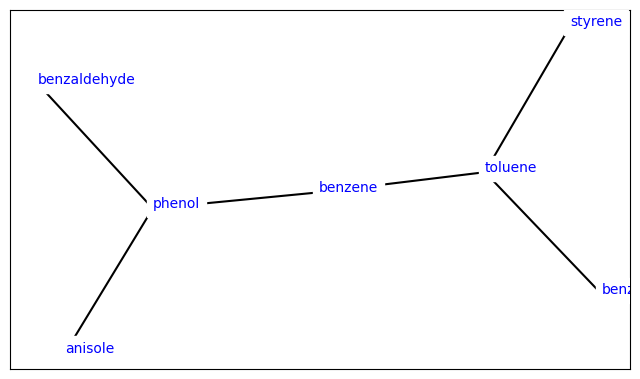

In [7]:
from openfe.utils.atommapping_network_plotting import plot_atommapping_network

plot_atommapping_network(ligand_network)